### Ejemplo adaptador tipo  L, adaptador para antena de 11m.

Supóngase querer adaptar una antena látigo de $3 m$ que presenta $50 \Omega$ a aprox. $27MHz$, pero que va a usarse a $3 MHz$, presentando en este caso una impedancia $Z_{ant}= 1 \Omega + j \frac{1}{2 \pi 3MHz 30pF}$.


![30-cuatrocientos](fig/ejemplo1a.png)


Se desea que el equipo transmisor, la fuente de corriente, tenga una carga de $Z_{in} = 50\Omega+j0\Omega$ @ $3 MHz$ para que esté adaptada, se recurre así al circuito de adaptación mostrado en la figura compuesto por L y C. Suponga que la resistencia de perdida de L es $r_p = 1\Omega$. 
La potencia disponible del transmisor es $P_{disp} = 100 W$. 


**Calculo L y C sin perdidas** 


Para el cálculo del inductor primero debemos neutralizar el efecto de la capacitancia producida en la antena. 
Para ello, separamos el inductor en dos inductores conectados en serie, como muestra la figura.



![31-cuatrocientos](fig/ejemplo1b.png)

Calculamos $L_b$ para que neutralice o resuene con la capacidad. 

$$X_c =\frac{1}{2 \pi 2MHz 30pF} = 2652.5 \Omega$$ 

$$L_b = \frac{X_c}{2 \pi 2MHz} = 211 \mu Hy$$

El circuito resultante en la rama es un RL serie en paralelo con el capacitor de adaptación. 
Es necesario que el circuito serie RL se presente como un circuito paralelo RL, donde R debe tomar valor el valor de $50 \Omega$. Para ello necesitamos calcular el $Q_M$ que permita obtener el valor buscado.

$$R_p = R_s (1+Q_M^2)$$ 

$$Q_M = \sqrt[]{\frac{R_p}{R_s}-1} = \sqrt[]{\frac{50}{1}-1} = 7$$

A partir de $Q_M$ calculamos $L_a$.


$$Q_M = \frac{\omega L_a}{R_s}$$ 

$$L_a = 557nHy$$


Para finalmente obtener el valor de $L$.

$$L = L_a + L_b =  211.557 \mu Hy$$

El capacitor que resuena con el $L'$ equivalente paralelo entonces,

$$C  = 11.14 nF$$

$$Q_o = \frac{\omega L}{r_p} = 7$$

$$\frac{1}{Q_c} = \frac{1}{Q_o} + \frac{\omega L_a'}{R_{ext}}$$

$$\frac{1}{Q_c} = \frac{1}{Q_o} + \frac{2 \pi 2MHz 568.3 nHy }{25}$$

$$Q_c= 2.33$$ 

![32-cuatrocientos](fig/ejemplo1c.png)



**Calcular la potencia en la carga.**


Para el calculo de la potencia, en base a la potencia disponible calculamos la carga. 

$$P_{disp} = \frac{i_g^2 r_g}{8} = 100 W$$

$$i_g = \sqrt{\frac{P_{disp} 8}{r_g}}$$

$$i_g = \sqrt{\frac{50 \cdot 8}{50 \Omega}}= 4 A$$





In [11]:
import myplot as myp
import numpy as np
import matplotlib.pyplot as plt
import csv

f = np.linspace(2e6,4e6,100)

w    = 2*np.pi*f

# Datos para los calculos 
fo    = 3e6
wo    = 2*np.pi*fo
Rl    = 0.3
Ca    = -1/(30e-9*wo)
rp    = 1
rg    = 50
Pdisp = 100

print('.param Rl =  {:1.2e} '.format(Rl) )
print('.param rg =  {:1.2e} '.format(rg) )
print('.param Ca  =  {:1.4e} '.format(Ca) )


## Etapa A

# Q de la antena 
Qa = 1/(wo*Ca*Rl)
# print(Qa)

# Neutralizo el capacitor
Xl = 1/(wo * Ca)         # reactancia de la antena 
La = Xl/wo               # neutraliza la reactancia de la antena 

# Etapa B
# Conversion serie-paralelo
Qm = ((rg/(Rl+rp)) -1)**0.5    # Calculo Qm necesario
#print(Qm)
XL  = Qm*(Rl+rp)            # L para lograr el Qm
Lb   = XL/wo
print('.param La  =  {:1.4e} '.format(La) )
print('.param Lb  =  {:1.4e} '.format(Lb) )
L = La + Lb
print('.param L  =  {:1.4e} '.format(L) )

#mean diameter of the coil    D = 200.0 mm
#number of turns              N = 26.0
#length of the coil           ℓ = 180.0 mm
#wire or tubing diameter      d = 3.0 mm
#design frequency             f = 3.0 MHz
#effective series inductance @ design frequency          L_eff_s = 9.433e-05 H
#effective series AC resistance @ design frequency       R_eff_s = 1.095e+00 Ω

print('.param rp =  {:1.2e} '.format(rp) )

XLp = XL*(1+1/Qm**2)

Cb   = 1/(XLp*wo)        # Capacitor sintonia 
print('.param Cb  =  {:1.4e} '.format(Cb) )
#https://www.knowlescapacitors.com/getattachment/ac79327c-78b2-4790-b841-4541dcd9a291/High-Power-RF
#http://datasheets.avx.com/HQ-Series.pdf
#effective series AC resistance @ design frequency       R_eff_s = 0.001 Ω

ig = ((Pdisp*8)/rg)**0.5

### Para simular con LTspice
print('.param ig =  {:1.2e} '.format(ig) )

# Impedacias!
ZaC   =       1/(1j*w*Ca)
ZaL   =          1j*w*La  
ZbL   = rp  +    1j*w*Lb   
ZbC   = 1e-3+ 1/(1j*w*Cb)





.param Rl =  3.00e-01 
.param rg =  5.00e+01 
.param Ca  =  -1.7684e+00 
.param La  =  -1.5915e-15 
.param Lb  =  4.2212e-07 
.param L  =  4.2212e-07 
.param rp =  1.00e+00 
.param Cb  =  6.4941e-09 
.param ig =  4.00e+00 


In [17]:
##### CALCULOS Impedancias

##### Za
Zia   = ZaL + ZaC + Rl

# Plot Za
#myp.PlotCpx(f,Zia , labelx = 'Frecuencia/Hz', labely = '$Z_{a}$')
#plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaZia.png')
#plt.show()

##### Zb
Zib   = (ZbC*(Zia+ZbL))/(ZbC+Zia+ZbL)
#print('Zib  =  {:1.2e} '.format(Zib[indice]) )
# Plot Zin
#myp.PlotCpx(f,Zib , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')
#plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaZib.png')
#plt.show()

Gamma = (Zib-rg)/(Zib+rg)

# Plot Gamma
#myp.PlotAry(f,-20*np.log10(np.abs(Gamma ) ), labelx = 'Frecuencia/Hz', labely = '$\Gamma_{in}$')
#plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaGamma.png')
#plt.show()


## Voltage and current
print('ig  =  {:1.2f} '.format(ig) )
# Etapa B
vb   = ig * (rg*Zib)/(rg+Zib)
ib   = vb / Zib

print('Vb  =  {:1.2f} V'.format(abs(vb) ))

print('ib  =  {:1.2f} A'.format(abs(ib) ))

# Etapa A
ia   = vb  / (ZbL+Zia) 
va   = ia  * Zia
print('Va   =  {:4.2f} V'.format(abs(va) ))
print('ia   =  {:4.2f} A'.format(abs(ia) ))


vLa  = np.abs(ia)     * ZaL
pLa  = (np.abs(ia)**2  * (ZbL+ZaL) ).real /2
print('VLa  =  {:4.2f} V'.format(abs(vLa) ))
print('PLa  =  {:4.2f} W'.format(abs(pLa) ))

vCa  = ia  * ZaC  
print('VCa  =  {:4.2f} V'.format(abs(vCa) ))

# Salida
vo   = ia * Rl
print('Vo  =  {:1.2f} V'.format(abs(vo) ))


## Potencias


###### Etapa B
PinB = abs(vb)**2 /Zib/2 
print('PinB  =  {:1.2f} W ({:1.2f} dBm)'.format(abs(PinB) , 10*np.log10(abs(PinB/1e-3))))

# Plot Potencia entrada
myp.PlotCpx(f,PinB , labelx = 'Frecuencia/Hz', labely = '$P_{inB}$')
plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaPinB.png')
plt.show()  


Avb  = Zia /(Zia+ZbL)
Gpb   = abs(Avb)**2 * (Zib/Zia)
print('Gpb  =  {:1.2f} ({:1.2f} dB) '.format(abs(Gpb), 10*np.log10(abs(Gpb))))
myp.PlotCpx(f,Gpb , labelx = 'Frecuencia/Hz', labely = '$G_{pB}$')
plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaGPB.png')
plt.show()  


###### Etapa A
PinA = abs(va)**2 /Zia/2 
print('PinA  =  {:1.2f} W ({:1.2f} dBm)'.format(abs(PinB) , 10*np.log10(abs(PinB/1e-3))))

# Plot Potencia entrada
myp.PlotCpx(f,PinA , labelx = 'Frecuencia/Hz', labely = '$P_{inA}$')
plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaPinA.png')
plt.show()  


Ava  = Rl /(ZaL+ZaC+Rl)
Gpa   = abs(Ava)**2 * (Zia/Rl)
print('Gpa  =  {:1.2f} ({:1.2f} dB) '.format(abs(Gpa[indice]), 10*np.log10(abs(Gpa[indice]))))
myp.PlotCpx(f,Gpa , labelx = 'Frecuencia/Hz', labely = '$G_{pA}$')
plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaGPA.png')
plt.show()  



####### Potencia de salida
Po = abs(vo)**2 /Rl/2 
print('Po  =  {:1.2f} W ({:1.2f} dBm)'.format(abs(Po[indice]) , 10*np.log10(abs(Po[indice]/1e-3))))

# Plot Potencia entrada
myp.PlotCpx(f,Po , labelx = 'Frecuencia/Hz', labely = '$P_{o}$')
plt.xlim([2.99e6, 3.01e6])
#plt.savefig('figures/ejemploAntenaPo.png')
plt.show()  

ig  =  4.00 


TypeError: unsupported format string passed to numpy.ndarray.__format__

49001
49001


/home/aalmela/scm/git/utn/eaiii/eaiii_2021/2_Circuitos_de_adaptacion/1_Didactica/myplot.py:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


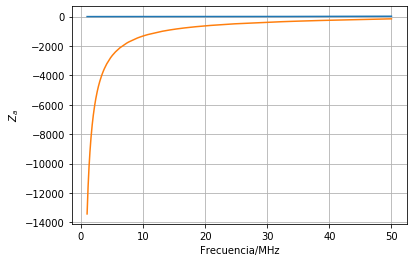

In [22]:
import myplot as myp
import numpy as np
import matplotlib.pyplot as plt
import csv

############# Cargo los datos del los archivos en /datos/..
Za = list()
with open('./datos/Za.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        for a in row:
            Za.append(complex((''.join(a.split())).replace("i","j")))
print(len(Za) )
            
            
fa = list()
with open('./datos/Fa.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        for a in row:
            fa.append(complex((''.join(a.split())).replace("i","j")))

print(len(fa) )            
f    = np.array(fa).real
Zant = np.array(Za)#[6400:6600]

# Plot Za
myp.PlotAry(f/1e6,[z.real for z in Zant], labelx = 'Frecuencia/MHz', labely = '$Z_{a}$')
myp.PlotAry(f/1e6,[z.imag for z in Zant], labelx = 'Frecuencia/MHz', labely = '$Z_{a}$')

#plt.savefig('figures/ejemploAntenaZia.png')
plt.show()